# Classification

### data label is categorical

    Metrics
        Confusion Matrix
        ROC Curve
        Precision-Recall Curve

In [62]:
import pandas as pd
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
# split data
from sklearn.model_selection import train_test_split

In [2]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 4821-D018

 Directory of C:\Users\emura\Documents\ABD_YZ_Kursu\Day 4\Day4StudentFiles

18.02.2024  10:37    <DIR>          .
18.02.2024  10:36    <DIR>          ..
18.02.2024  10:37    <DIR>          .ipynb_checkpoints
18.02.2024  10:36           732.473 Day 4 - classification.ipynb
18.02.2024  08:15           223.120 hr_data.csv
               2 File(s)        955.593 bytes
               3 Dir(s)  28.022.226.944 bytes free


In [4]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,2,5993.0,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,1,5130.0,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,2,2090.0,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,1,2909.0,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,1,3468.0,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,No


In [3]:
df=pd.read_csv("hr_data.csv")

In [7]:
df.sample(5)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
398,37,Non-Travel,1063,Research & Development,25,5,Medical,1,529,2,Female,72,3,2,Research Scientist,3,1,4449.0,23866,3,Y,Yes,15,3,1,80,2,15,2,3,13,11,10,7,No
465,46,Travel_Frequently,1034,Research & Development,18,1,Medical,1,624,1,Female,86,3,3,Healthcare Representative,3,1,10527.0,8984,5,Y,No,11,3,4,80,0,28,3,2,2,2,1,2,No
476,24,Travel_Rarely,823,Research & Development,17,2,Other,1,643,4,Male,94,2,1,Laboratory Technician,2,1,2127.0,9100,1,Y,No,21,4,4,80,1,1,2,3,1,0,0,0,No
156,51,Travel_Rarely,1169,Research & Development,7,4,Medical,1,211,2,Male,34,2,2,Manufacturing Director,3,1,6132.0,13983,2,Y,No,17,3,3,80,0,10,2,3,1,0,0,0,No
227,29,Travel_Frequently,1413,Sales,1,1,Medical,1,312,2,Female,42,3,3,Sales Executive,4,1,7918.0,6599,1,Y,No,14,3,4,80,1,11,5,3,11,10,4,1,No


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   BusinessTravel            1470 non-null   object 
 2   DailyRate                 1470 non-null   int64  
 3   Department                1470 non-null   object 
 4   DistanceFromHome          1470 non-null   int64  
 5   Education                 1470 non-null   int64  
 6   EducationField            1470 non-null   object 
 7   EmployeeCount             1470 non-null   int64  
 8   EmployeeNumber            1470 non-null   int64  
 9   EnvironmentSatisfaction   1470 non-null   int64  
 10  Gender                    1470 non-null   object 
 11  HourlyRate                1470 non-null   int64  
 12  JobInvolvement            1470 non-null   int64  
 13  JobLevel                  1470 non-null   int64  
 14  JobRole 

In [15]:
df.describe().T #Traspose

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.000000,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.000000,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.000000,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.000000,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.000000,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.750000,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.000000,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.750000,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.000000,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.000000,5.0


In [14]:
df.shape

(1470, 35)

In [20]:
df.columns.to_list()

['Age',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Attrition']

In [23]:
df.dtypes

Age                           int64
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                 int64
MonthlyIncome               float64
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StandardHours                 int64
StockOptionLevel              int64
TotalWorkingYears           

In [26]:
df.isnull().sum()

Age                           0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInC

In [27]:
df['Attrition'].value_counts()

No     1020
Yes     185
Name: Attrition, dtype: int64

<Axes: xlabel='Attrition', ylabel='count'>

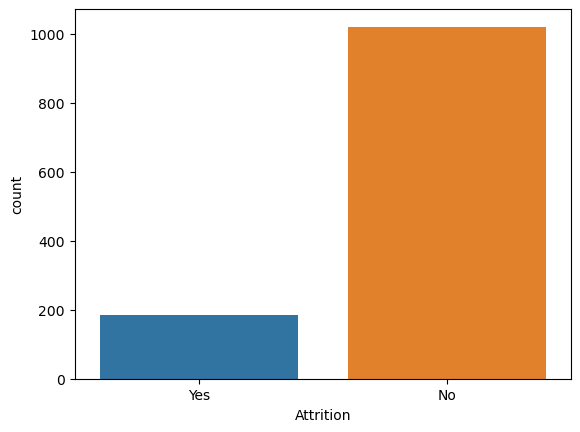

In [30]:
sns.countplot(x='Attrition',data=df)

In [31]:
d={'No':0,'Yes':1}

In [32]:
df['Attrition']=df['Attrition'].map(d) #map equal to apply like a for loop

In [ ]:
#using lambda
df['Attrition']=df['Attrition'].apply(lambda x:1 if x=='Yes' else 0)

In [33]:
df['Attrition']

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
1465    NaN
1466    0.0
1467    0.0
1468    0.0
1469    0.0
Name: Attrition, Length: 1470, dtype: float64

In [39]:
empty = df[df.isnull().any(axis=1)]
full = df.dropna()

In [40]:
empty['Attrition']

367    NaN
368    NaN
369    NaN
370    NaN
371    NaN
        ..
1461   NaN
1462   NaN
1463   NaN
1464   NaN
1465   NaN
Name: Attrition, Length: 265, dtype: float64

In [38]:
full['Attrition']

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
1439    0.0
1466    0.0
1467    0.0
1468    0.0
1469    0.0
Name: Attrition, Length: 1205, dtype: float64

In [87]:
X=full.drop('Attrition',axis=1)
y=full['Attrition']

In [88]:
#X['Attrition'].head()

KeyError: 'Attrition'

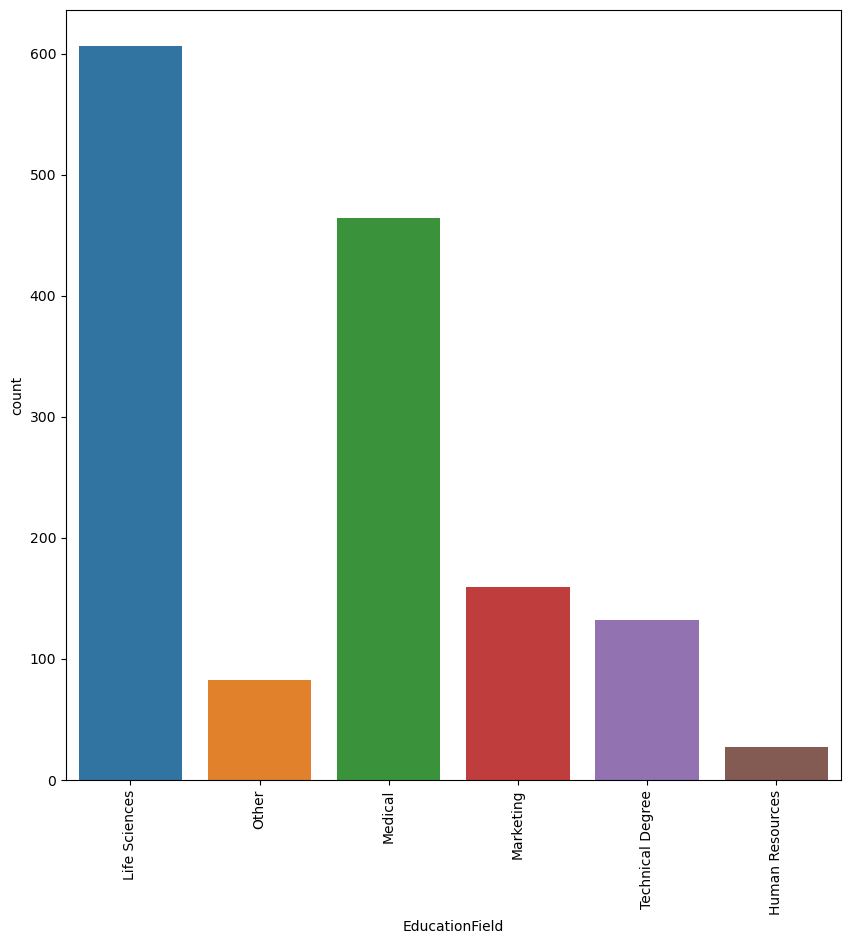

In [89]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.countplot(x='EducationField',data=df);

In [90]:
X=pd.get_dummies(X,drop_first=True)

In [91]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [92]:
#x_train['Attrition'].head()

KeyError: 'Attrition'

## Modelling

In [116]:
from  sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
#accuaracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [94]:
g=GaussianNB()
b=BernoulliNB()

In [95]:
g.fit(x_train,y_train)

GaussianNB()

In [96]:
g_predict=g.predict(x_test)

In [97]:
accuracy_score(g_predict,y_test)

0.8066298342541437

<Axes: >

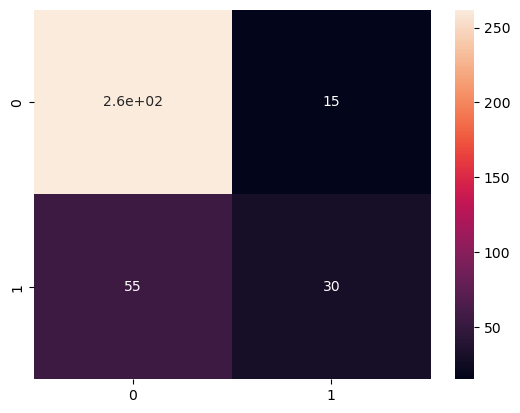

In [98]:
sns.heatmap(confusion_matrix(g_predict,y_test),annot=True)

In [99]:
print(classification_report(g_predict,y_test))

              precision    recall  f1-score   support

         0.0       0.83      0.95      0.88       277
         1.0       0.67      0.35      0.46        85

    accuracy                           0.81       362
   macro avg       0.75      0.65      0.67       362
weighted avg       0.79      0.81      0.78       362



In [100]:
b.fit(x_train,y_train)

BernoulliNB()

In [101]:
b_predict=b.predict(x_test)

In [102]:
accuracy_score(b_predict,y_test)

0.8397790055248618

In [103]:
print(classification_report(b_predict,y_test))

              precision    recall  f1-score   support

         0.0       0.91      0.90      0.91       321
         1.0       0.31      0.34      0.33        41

    accuracy                           0.84       362
   macro avg       0.61      0.62      0.62       362
weighted avg       0.85      0.84      0.84       362



In [ ]:
#inbalance data smote packet

In [106]:
l=LogisticRegression()
l.fit(x_train,y_train)
l_predict=l.predict(x_test)
accuracy_score(l_predict,y_test)

0.8701657458563536

In [107]:
print(classification_report(l_predict,y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.88      0.93       360
         1.0       0.00      0.00      0.00         2

    accuracy                           0.87       362
   macro avg       0.50      0.44      0.47       362
weighted avg       0.99      0.87      0.93       362



In [108]:
confusion_matrix(l_predict,y_test)

array([[315,  45],
       [  2,   0]], dtype=int64)

In [110]:
dt=DecisionTreeClassifier()

In [111]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [112]:
dt_predict=dt.predict(x_test)

In [113]:
accuracy_score(dt_predict,y_test)

0.7900552486187845

In [114]:
confusion_matrix(dt_predict,y_test)

array([[272,  31],
       [ 45,  14]], dtype=int64)

In [115]:
print(classification_report(dt_predict,y_test))

              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       303
         1.0       0.31      0.24      0.27        59

    accuracy                           0.79       362
   macro avg       0.58      0.57      0.57       362
weighted avg       0.77      0.79      0.78       362



In [117]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf_predict=rf.predict(x_test)
accuracy_score(rf_predict,y_test)

0.8839779005524862

In [118]:
accuracy_score(rf_predict,y_test)

0.8839779005524862

In [119]:
print(classification_report(rf_predict,y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94       357
         1.0       0.09      0.80      0.16         5

    accuracy                           0.88       362
   macro avg       0.54      0.84      0.55       362
weighted avg       0.98      0.88      0.93       362



In [120]:
confusion_matrix(rf_predict,y_test)

array([[316,  41],
       [  1,   4]], dtype=int64)

In [134]:
from  sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
#accuaracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
def model_classification(X,y):
    '''
    X: independent variable
    y: dependent variable
    return best model and its accuracy
    '''
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
    models = [GaussianNB(),BernoulliNB(),LogisticRegression(),RandomForestClassifier(), GradientBoostingClassifier(), KNeighborsClassifier(n_neighbors=5)]
    results=[]
    for model in models:
        model.fit(x_train,y_train)
        model_predict=model.predict(x_test)
        print("Model: ",model)
        print("Model Accuracy: ",accuracy_score(model_predict,y_test))
        print("Model Confusion Matrix: ",confusion_matrix(model_predict,y_test),"\n")
        print("Model Classification Report: ",classification_report(model_predict,y_test))
        print("-"*50)
        results.append(accuracy_score(model_predict,y_test))
    #best model
    best_model=models[results.index(max(results))]
    print("Best Model: ",best_model)
    print("Best Model Accuracy: ",max(results))
    return best_model,max(results), confusion_matrix(model_predict,y_test)

In [135]:
model_classification(X,y)

Model:  GaussianNB()
Model Accuracy:  0.8066298342541437
Model Confusion Matrix:  [[262  15]
 [ 55  30]] 

Model Classification Report:                precision    recall  f1-score   support

         0.0       0.83      0.95      0.88       277
         1.0       0.67      0.35      0.46        85

    accuracy                           0.81       362
   macro avg       0.75      0.65      0.67       362
weighted avg       0.79      0.81      0.78       362

--------------------------------------------------
Model:  BernoulliNB()
Model Accuracy:  0.8397790055248618
Model Confusion Matrix:  [[290  31]
 [ 27  14]] 

Model Classification Report:                precision    recall  f1-score   support

         0.0       0.91      0.90      0.91       321
         1.0       0.31      0.34      0.33        41

    accuracy                           0.84       362
   macro avg       0.61      0.62      0.62       362
weighted avg       0.85      0.84      0.84       362

--------------------

(RandomForestClassifier(),
 0.8867403314917127,
 array([[306,  45],
        [ 11,   0]], dtype=int64))

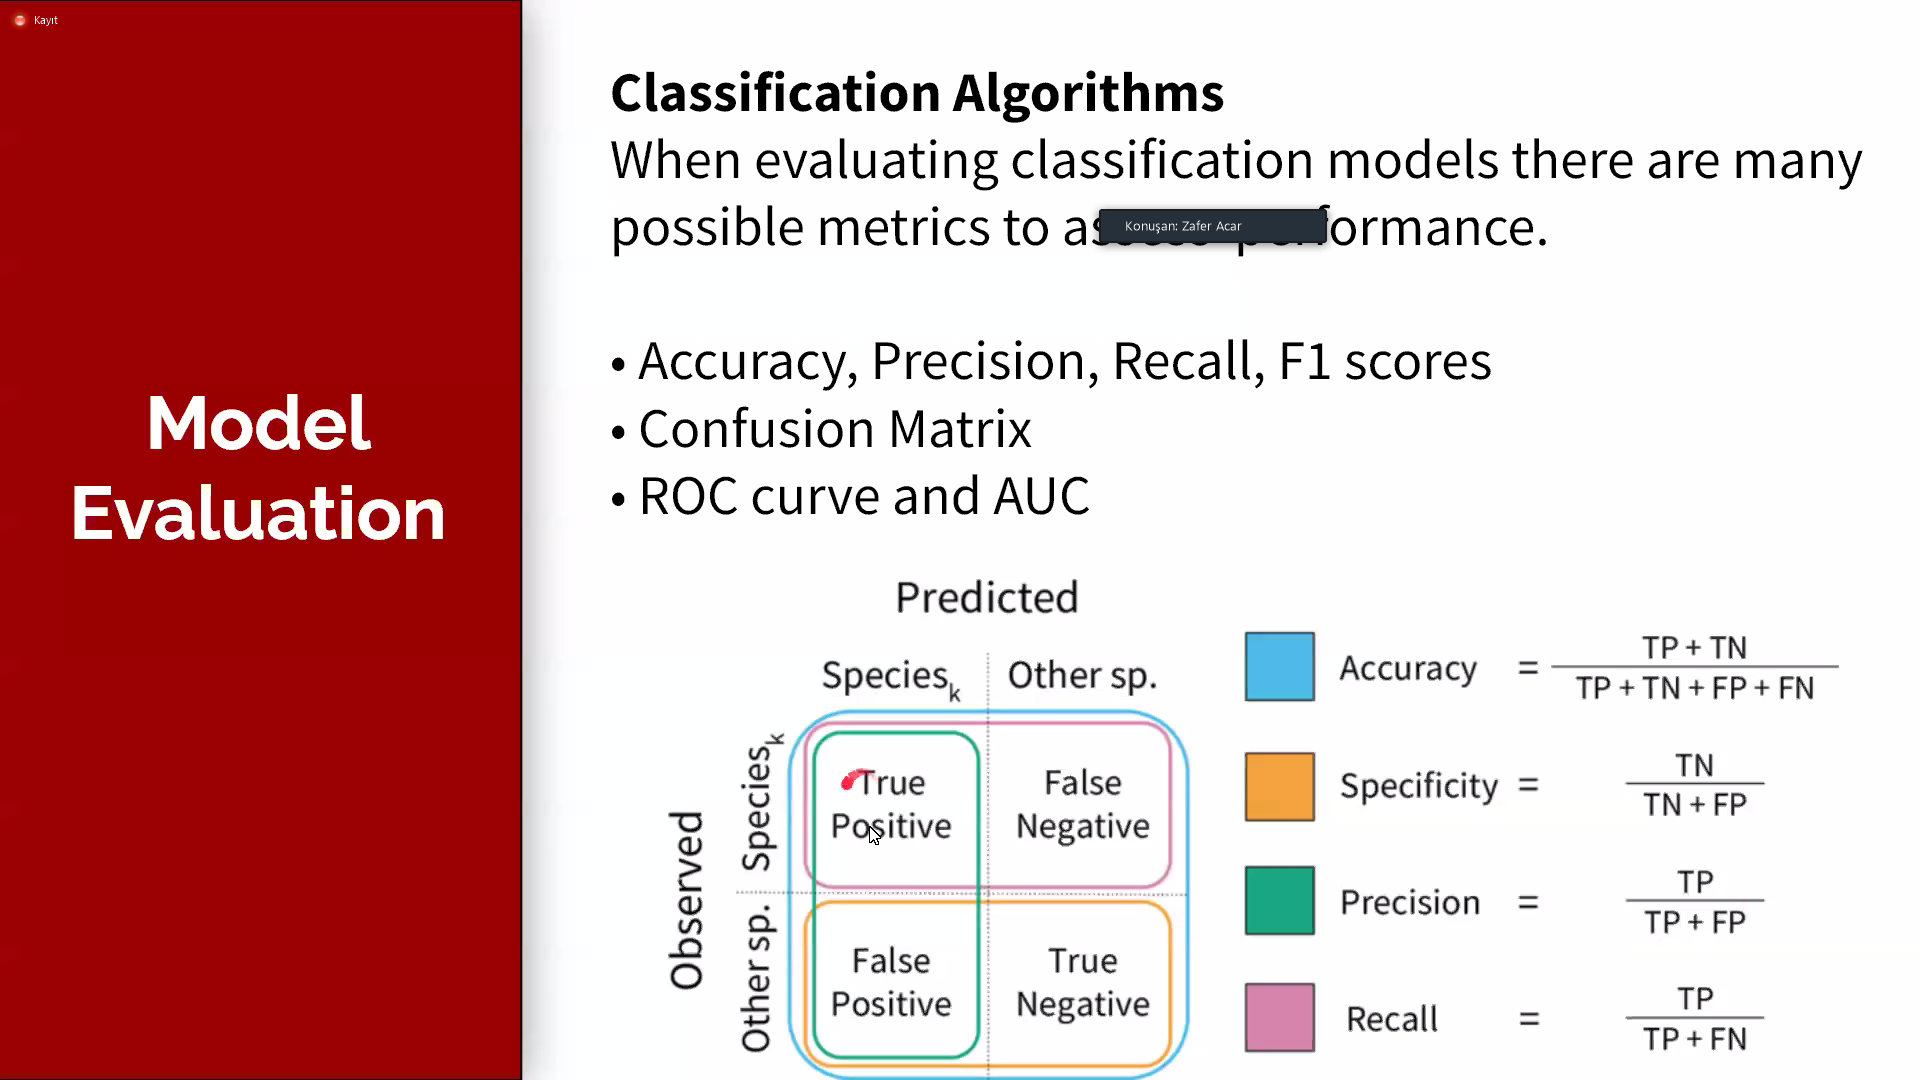

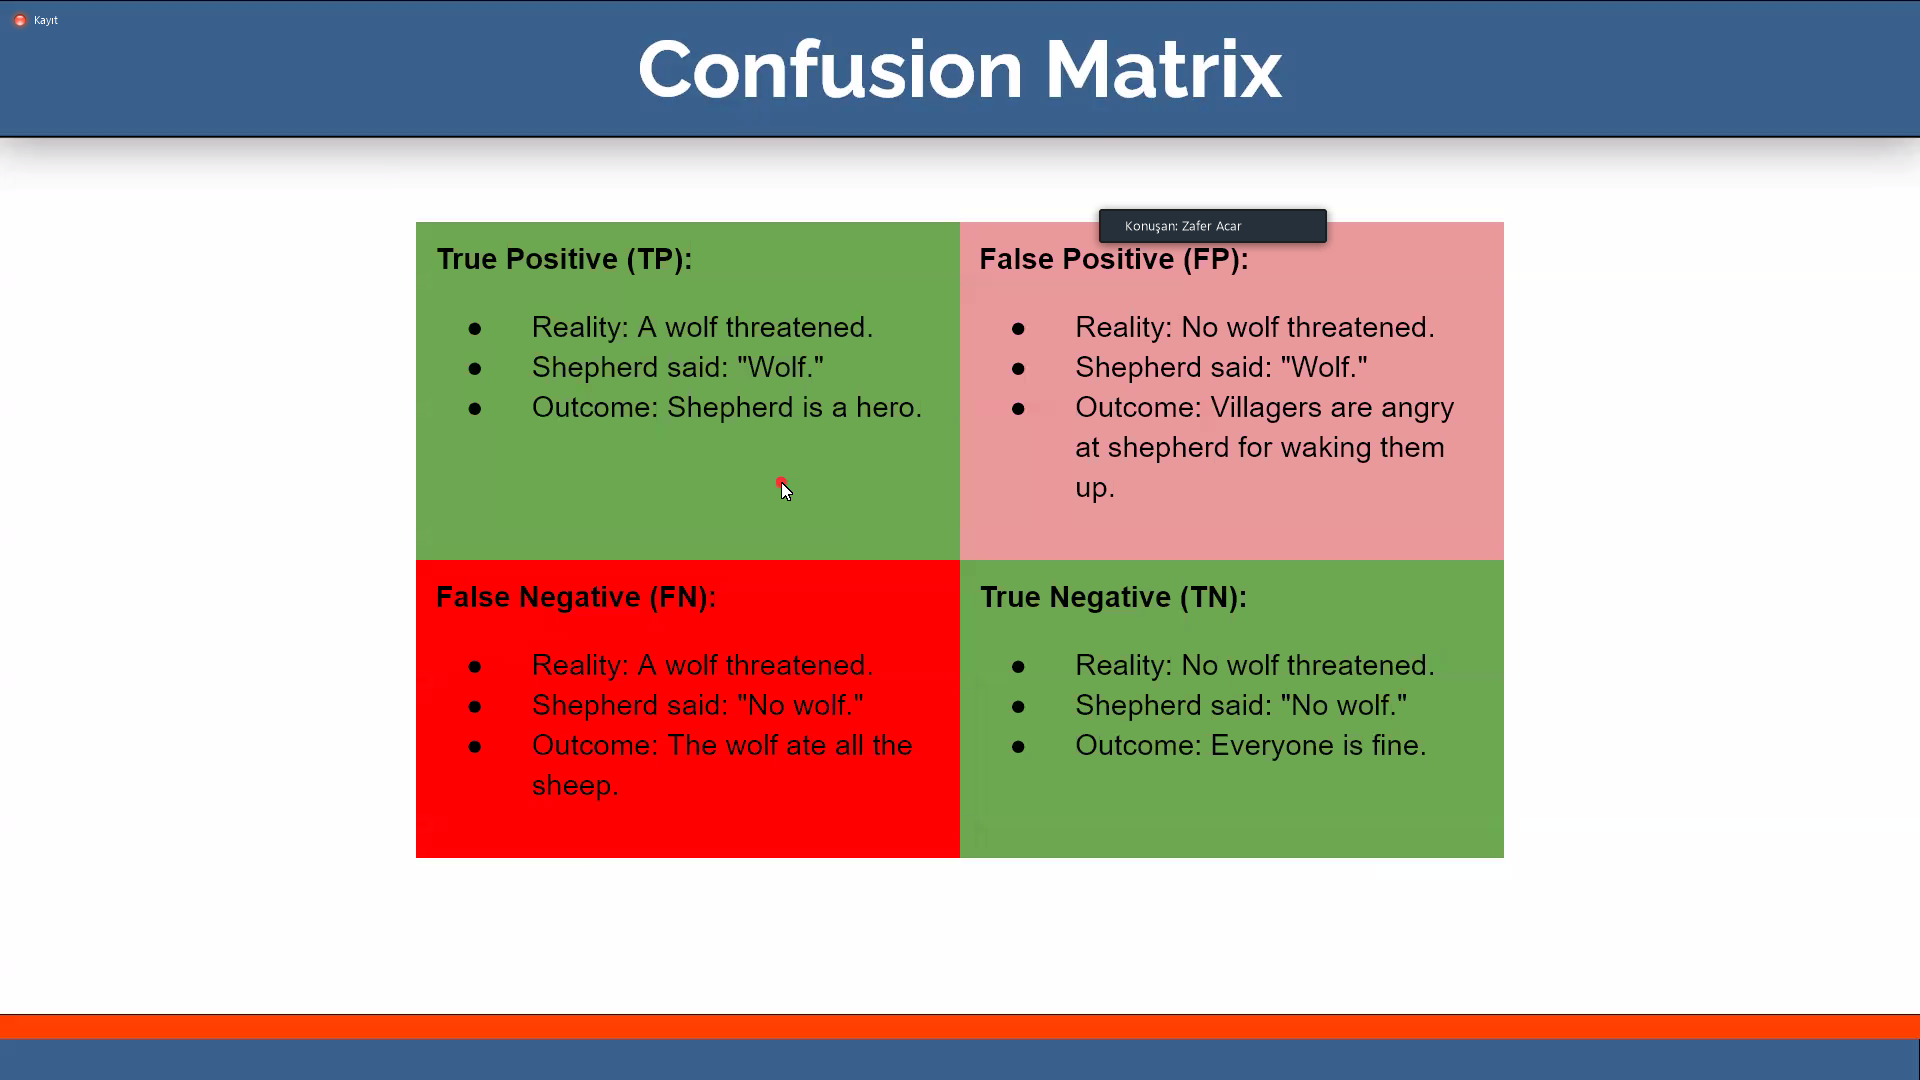